In [1]:
%cd /content/
!rm -r /content/ML-para-Negocios #remueve el repositorio si es que ya se habia cargado
!git clone https://github.com/emmt1998/ML-para-Negocios.git #copia el repositorio
%cd /content/ML-para-Negocios/workshop_02/ml-latest-small/

/content
rm: cannot remove '/content/ML-para-Negocios': No such file or directory
Cloning into 'ML-para-Negocios'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 123 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (123/123), 8.30 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/ML-para-Negocios/workshop_02/ml-latest-small


In [ ]:
import pandas as pd

peliculas = pd.read_csv("movies.csv")
#peliculas.columns = ["peliculaId", "titulo", "generos"]  # renombramos coloumnas
#peliculas = peliculas.set_index("peliculaId") # eliminamos indice del dataset
peliculas.head()

,titulo,generos
peliculaId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "peliculaId", "nota", "momento"] # renombramos coloumnas
notas = notas.set_index("usuarioId") # eliminamos indice del dataset
notas.head()

,peliculaId,nota,momento
usuarioId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


In [ ]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,492743.000000,492743.000000,492743.000000,4.927430e+05
mean,2481.021307,19148.468963,3.521933,1.191202e+09
std,1453.661262,36210.993514,1.062460,2.159963e+08
min,1.000000,1.000000,0.500000,8.256384e+08
25%,1200.000000,1090.000000,3.000000,1.001242e+09
50%,2428.000000,2719.000000,3.500000,1.171580e+09
75%,3791.000000,7215.500000,4.000000,1.418069e+09
max,4998.000000,193861.000000,5.000000,1.537927e+09


# Primera tentativa de recomendación: heurística de total de votos

In [ ]:
total_de_votos = notas["peliculaId"].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: peliculaId, dtype: int64

# ¿ Cómo saber títiulo de la película que tiene el código 318 ?

In [ ]:
peliculas.loc[318]

titulo            Shawshank Redemption, The (1994)
generos                                Crime|Drama
total_de_votos                                 317
nota_media                                 4.42902
Name: 318, dtype: object

# Podemos buscar en internet más información sobre esa película en especial ....
google ... imdb Shawshank Redemption

In [ ]:
peliculas['total_de_votos'] = total_de_votos     # insertamos una nueva columna
peliculas.head()

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [ ]:
peliculas.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [ ]:
notas_medias = notas.groupby("peliculaId").mean()["nota"]
notas_medias.head()

peliculaId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
peliculas["nota_media"] = notas_medias
peliculas.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


# Segunda heurística: nota media y filtrando los votos

In [ ]:
peliculas.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [ ]:
peliculas.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [ ]:
peliculas_con_mas_de_50_votos = peliculas.query("total_de_votos >= 50")
peliculas_con_mas_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
yo_vi = [1, 21, 19, 10, 11, 7, 2]
peliculas.loc[yo_vi]

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
aventura_infantil_y_fantasia = peliculas_con_mas_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_y_fantasia.drop(yo_vi, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Collaborative filtering x Content based filtering

# Buscando usuarios "similares"



In [ ]:
from google.colab import files
from IPython.display import Image


Saving UsuariosPeliculas.png to UsuariosPeliculas (1).png


Saving UsuariosPeliculas.png to UsuariosPeliculas (5).png


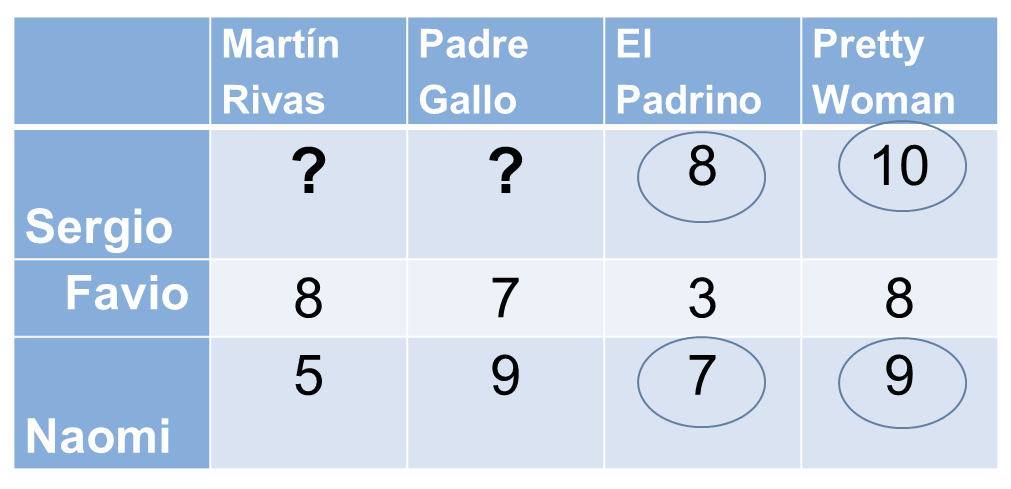

In [ ]:
cargar1 = files.upload()
Image("UsuariosPeliculas.png",width=500)


Saving distanciaEuclidiana.png to distanciaEuclidiana (3).png


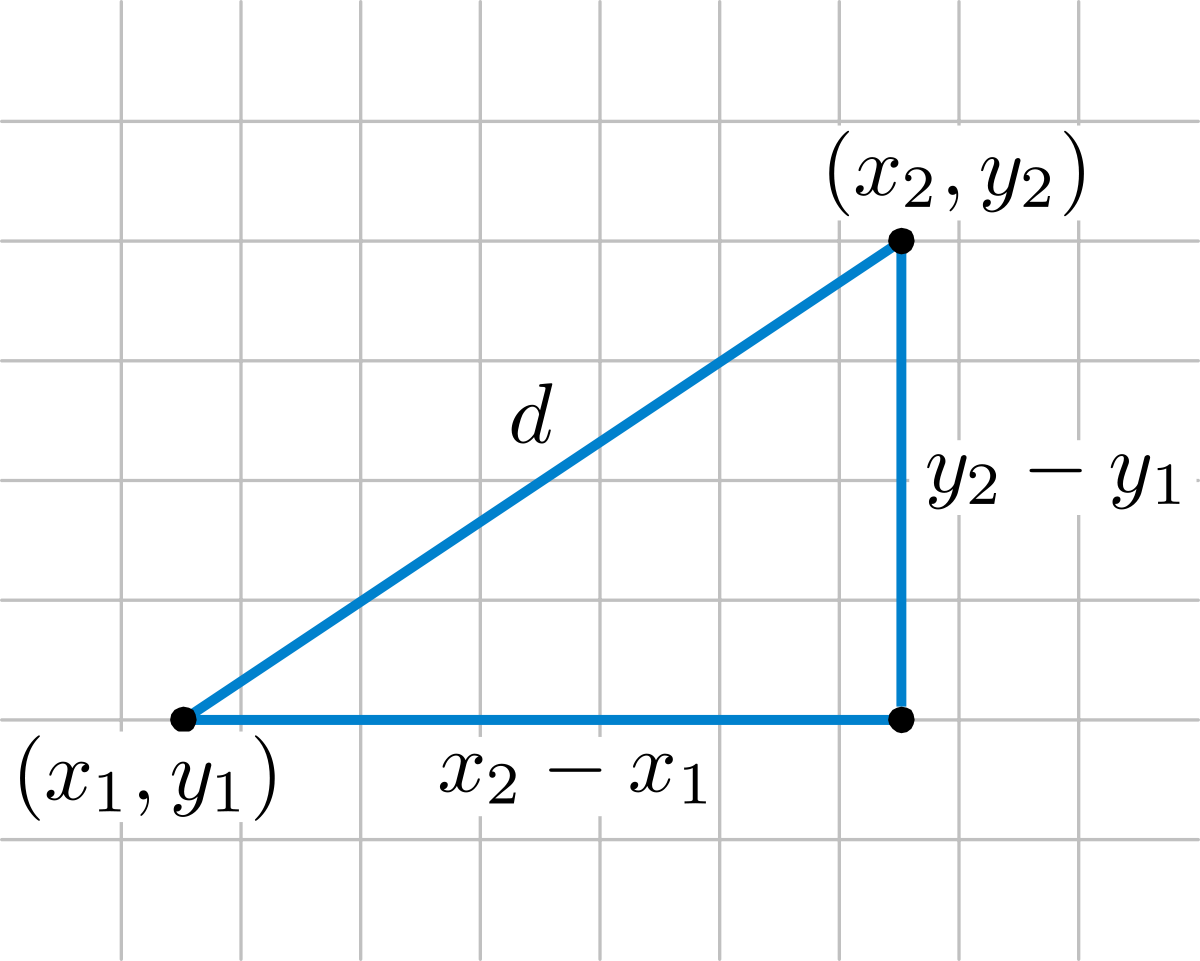

In [ ]:
cargar2 = files.upload()
Image("distanciaEuclidiana.png",width=400)

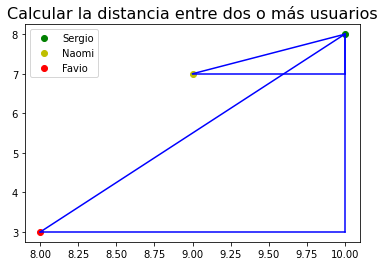

In [ ]:
import matplotlib.pyplot as plt
plt.plot(10, 8, "go")
plt.plot(9, 7, "yo")
plt.plot(8, 3, "ro")
plt.legend(["Sergio", "Naomi","Favio"])
plt.title("Calcular la distancia entre dos o más usuarios", fontsize='16')

plt.plot([9, 10], [7, 8], color="b", linestyle="-")
plt.plot([9, 10], [7, 7], color="b", linestyle="-")
plt.plot([10, 10], [7, 8], color="b", linestyle="-")

plt.plot([8, 10], [3, 8], color="b", linestyle="-")
plt.plot([8, 10], [3, 3], color="b", linestyle="-")
plt.plot([10, 10],[3, 8], color="b", linestyle="-")


In [ ]:
import numpy as np

sergio = np.array([10, 8])
naomi = np.array([9, 7])
favio = np.array([8, 3])

sergio - naomi, sergio - favio


(array([1, 1]), array([2, 5]))

In [ ]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(sergio, naomi)

1.4142135623730951

In [ ]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(sergio, naomi)

1.4142135623730951

In [ ]:

def distancia(a,b):
  return np.linalg.norm(a - b)

In [ ]:
print('distancia entre Sergio y Naomi= ', distancia(sergio,naomi))
print('distancia entre Sergio y Favio= ', distancia(sergio,favio))

distancia entre Sergio y Naomi=  1.4142135623730951
distancia entre Sergio y Favio=  5.385164807134504
